### The goal is to get a dataframe of the measured position 

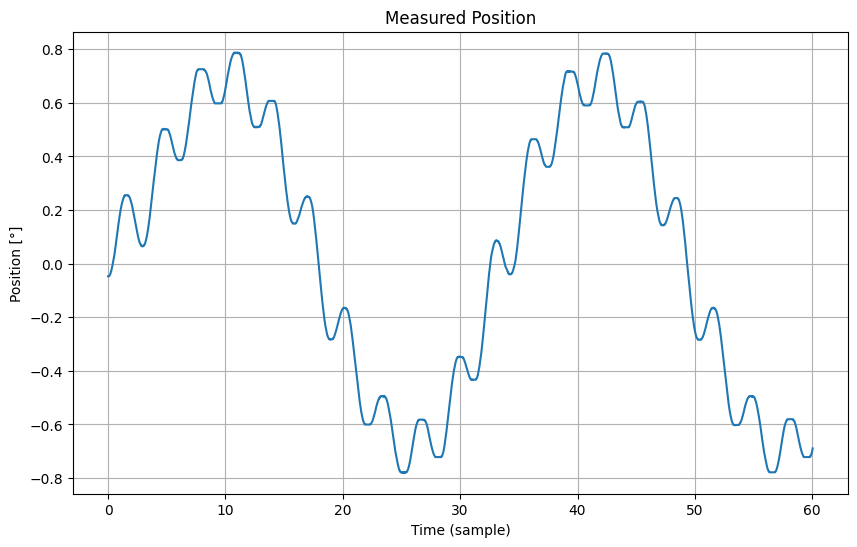

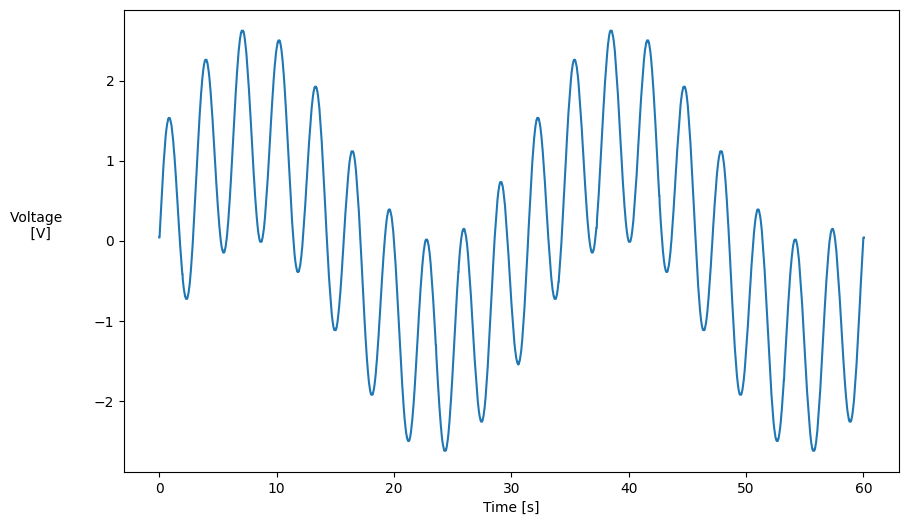

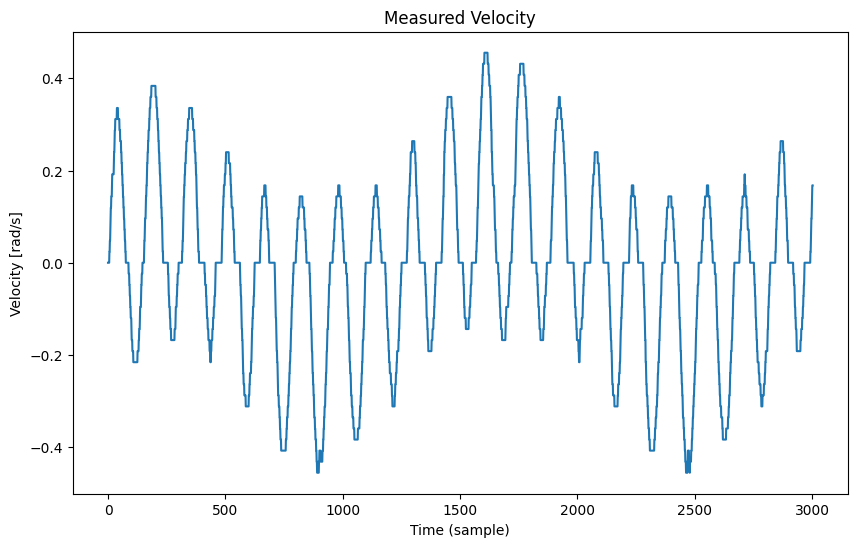

In [1]:
from src.data_processing import process_file
from src.plotting import (
    plot_measured_I, 
    plot_measured_q, 
    plot_measured_q_dot,
    plot_measured_U
)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Select the measurements
file_name = "M1_chirp_05_200"
# file_name = "M1_chirp_075_2"
# file_name = "M1_chirp_increasing_075_2"
# file_name = "M1_chirp_increasing_075_3"
file_name = "M1_sin_in_sin_1"
file_name = "M1_sin_in_sin_075"
# file_name = "M1_sin_in_sin_in_sin"
# file_name = "M1_sin_in_sin"

file_path = f"data/validation_exp/chirp/{file_name}.txt"

df = process_file(file_path, delta_t=0.02)

df['DXL_Position'] = df['DXL_Position'] - np.pi/2
df['DXL_Position'] = (df['DXL_Position'] * 180/np.pi - 1.5) * np.pi/180

plot_measured_q(df)
plot_measured_U(df)
plot_measured_q_dot(df)

df = df.rename(columns={'t':'timestamp', 'DXL_Position':'θ(t)'})
# csv_filename = f'data/validation_exp/chirp_processed/{file_name}.csv'
# df.to_csv(csv_filename, index=False)

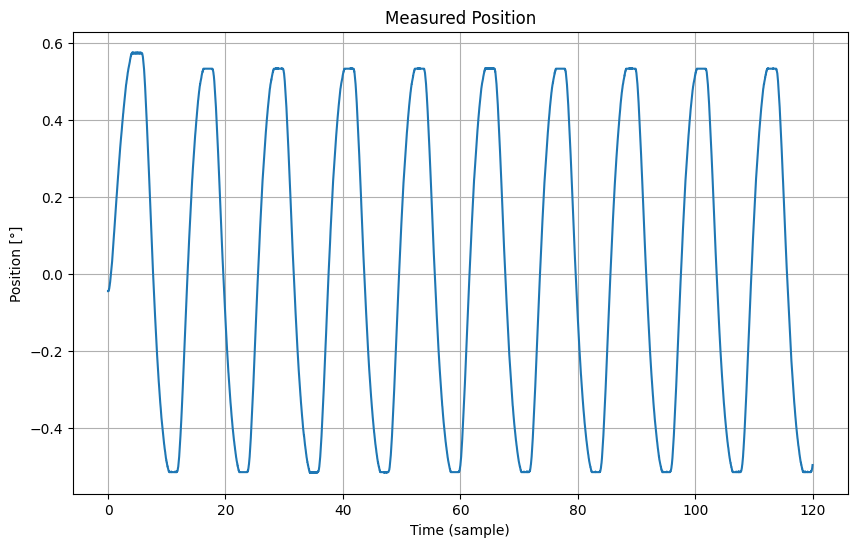

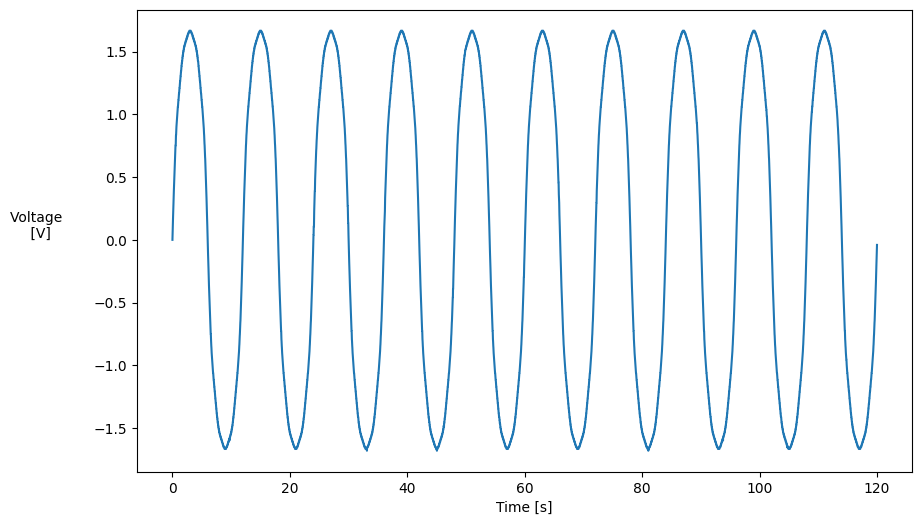

In [2]:
from src.data_processing import process_file
from src.plotting import (
    plot_measured_I, 
    plot_measured_q, 
    plot_measured_q_dot,
    plot_measured_U
)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Select the measurements
# file_name = "exp1_square" -> redondant
# file_name = "exp1_tooth" -> redondant 
file_name = "exp2_square"
file_name = "exp2_tooth"
file_name = "exp2_triangle"
file_name = "exp3_square_1_5"
file_name = "exp3_tooth_1_5"
file_name = "exp3_triangle_1_5"

file_path = f"data/validation_exp/PWM_control_exp/{file_name}.txt"

df = process_file(file_path, delta_t=0.02)

df['DXL_Position'] = df['DXL_Position'] - np.pi/2
df['DXL_Position'] = (df['DXL_Position'] * 180/np.pi) * np.pi/180

plot_measured_q(df)
plot_measured_U(df)

df = df.rename(columns={'t':'timestamp', 'DXL_Position':'θ(t)'})
csv_filename = f'data/validation_exp/PWM_processed/{file_name}.csv'
df.to_csv(csv_filename, index=False)

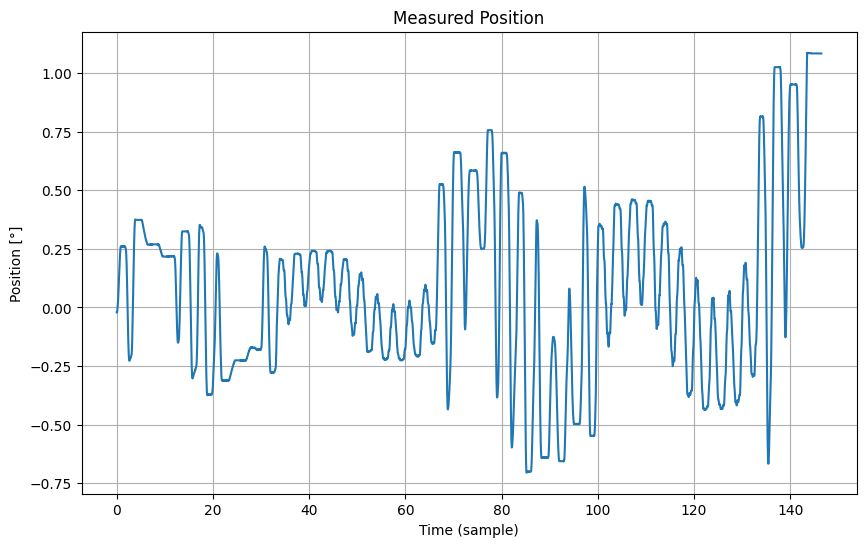

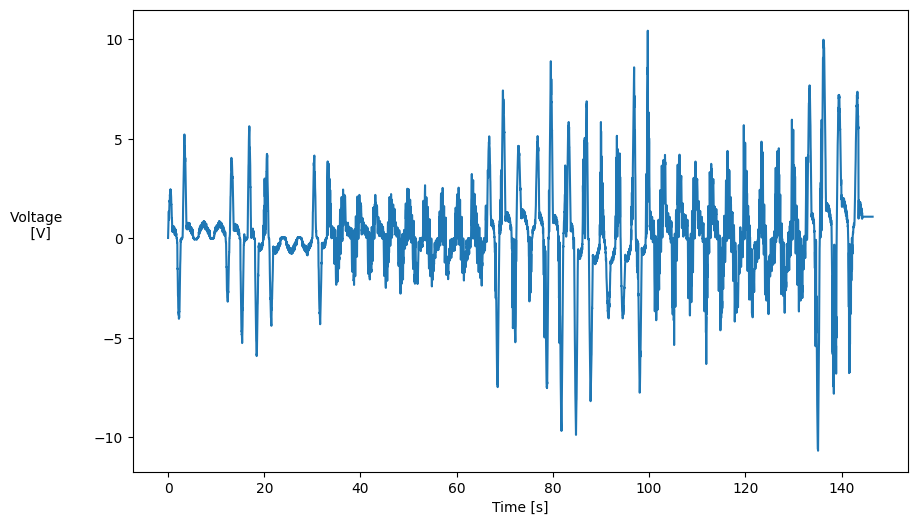

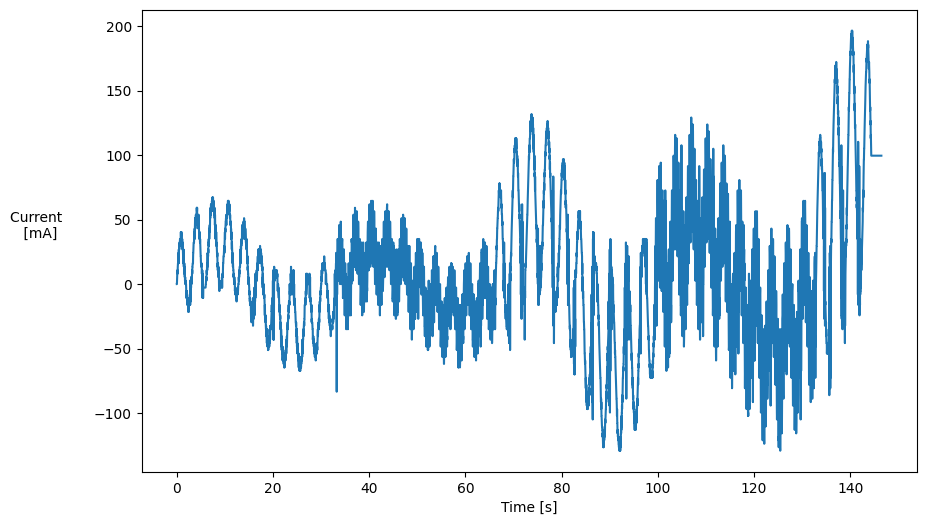

In [6]:
from src.data_processing import process_file
from src.plotting import (
    plot_measured_I, 
    plot_measured_q, 
    plot_measured_q_dot,
    plot_measured_U
)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Select the measurements
file_name = "chirp_1"
file_name = "non_trivial_2"
file_name = "non_trivial_current" # dyn_210, dyn_210_2, non_trivial_current

# file_path = f"data/validation_exp/calibration/{file_name}.txt"
file_path = f"data/validation_exp/mesures/{file_name}.txt"

df = process_file(file_path, delta_t=0.02)

df['DXL_Position'] = df['DXL_Position'] - np.pi/2
df['DXL_Position'] = (df['DXL_Position'] * 180/np.pi - 1.6) * np.pi/180

plot_measured_q(df)
plot_measured_U(df)
plot_measured_I(df)

df = df.rename(columns={'t':'timestamp', 'DXL_Position':'θ(t)'})
csv_filename = f'data/validation_exp/calibration_processed/{file_name}.csv'
csv_filename = f'data/validation_exp/mesures/{file_name}.csv'

df.to_csv(csv_filename, index=False)

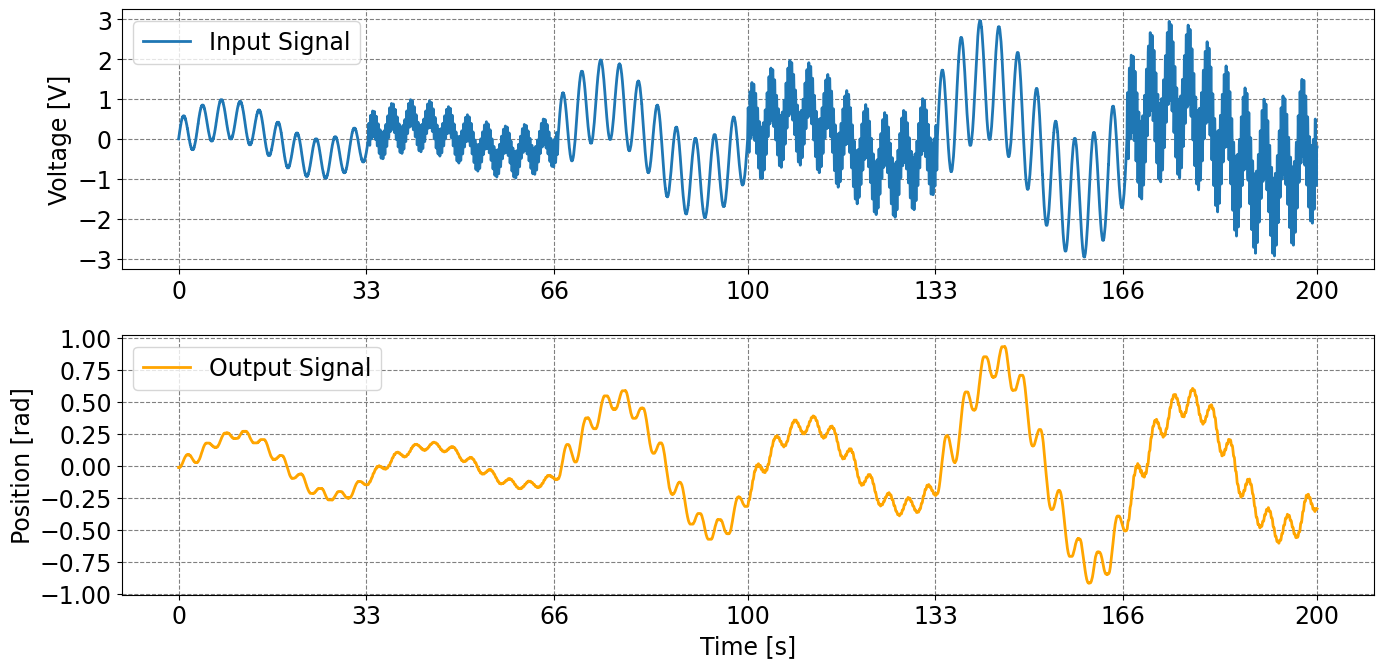

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import spectrogram, bode
from scipy.signal import cwt, ricker
import matplotlib as mpl

# Set the font size globally
mpl.rcParams.update({'font.size': 17})  # Change 14 to your desired font size

# Ensure 'U' and 'θ(t)' are numeric and sorted by 'timestamp'
df.sort_values('timestamp', inplace=True)
df['U'] = pd.to_numeric(df['U'], errors='coerce')
df['θ(t)'] = pd.to_numeric(df['θ(t)'], errors='coerce')

# Calculate sampling interval and frequency
T = np.mean(np.diff(df['timestamp']))
fs = 1.0 / T

# Time-domain plot
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df['timestamp'], df['U'], label='Input Signal', linewidth=2)
# plt.title('Time-domain Signal')
plt.ylabel('Voltage [V]')
plt.legend()
plt.xticks([0, 33, 66, 100, 133, 166, 200])
plt.yticks([-3, -2, -1, 0, 1, 2, 3])
plt.grid(which='major', axis='x', linestyle='--', color='gray')
plt.grid(which='major', axis='y', linestyle='--', color='gray')

plt.subplot(2, 1, 2)
plt.plot(df['timestamp'], df['θ(t)'], label='Output Signal', color='orange', linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel('Position [rad]')
plt.legend()
plt.tight_layout()
plt.xticks([0, 33, 66, 100, 133, 166, 200])
plt.yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
plt.grid(which='major', axis='x', linestyle='--', color='gray')
plt.grid(which='major', axis='y', linestyle='--', color='gray')

plt.show()

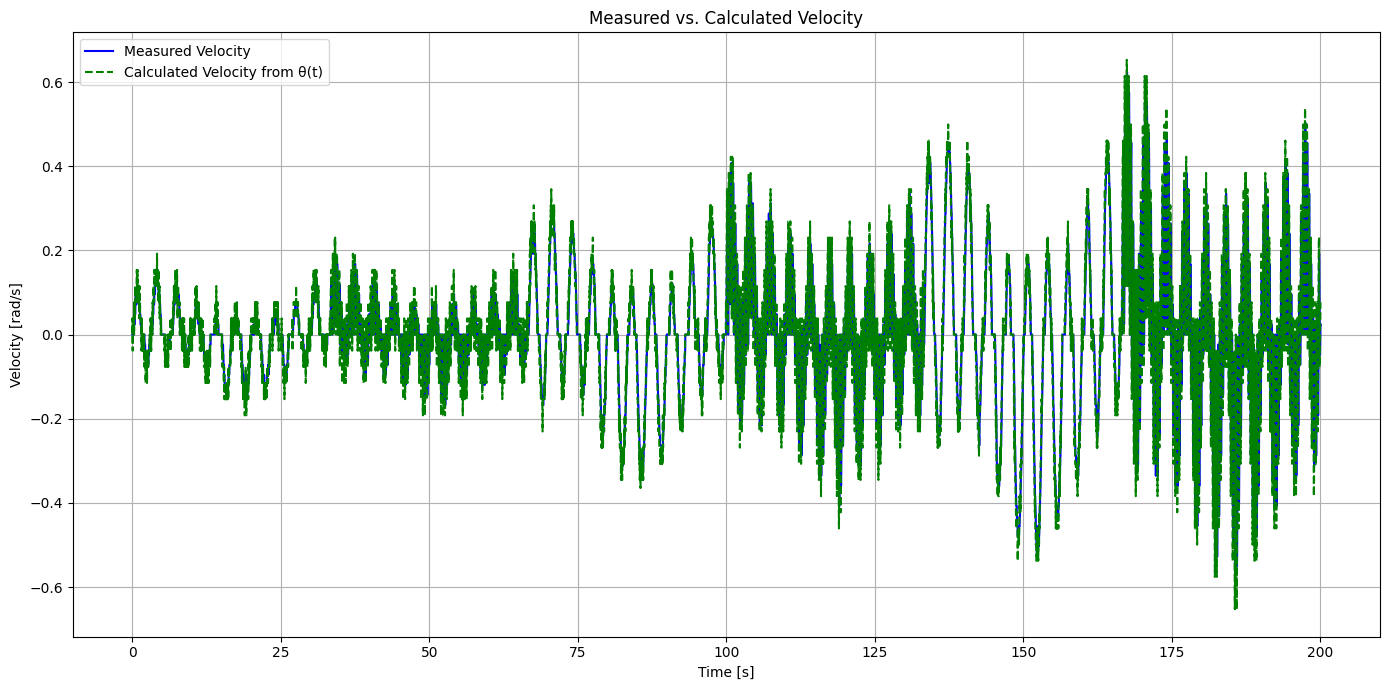

In [118]:
# Calculate the derivative of the position data to obtain velocity
# Using the central difference method for all interior points and forward/backward difference for the endpoints
velocity_calculated = np.gradient(df['θ(t)'], df['timestamp'])

# Plot measured velocity vs. calculated velocity
plt.figure(figsize=(14, 7))

# Measured velocity
plt.plot(df['timestamp'], df['DXL_Velocity'], label='Measured Velocity', color='blue')

# Calculated velocity from position data
plt.plot(df['timestamp'], velocity_calculated, label='Calculated Velocity from θ(t)', color='green', linestyle='--')

plt.xlabel('Time [s]')
plt.ylabel('Velocity [rad/s]')
plt.title('Measured vs. Calculated Velocity')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


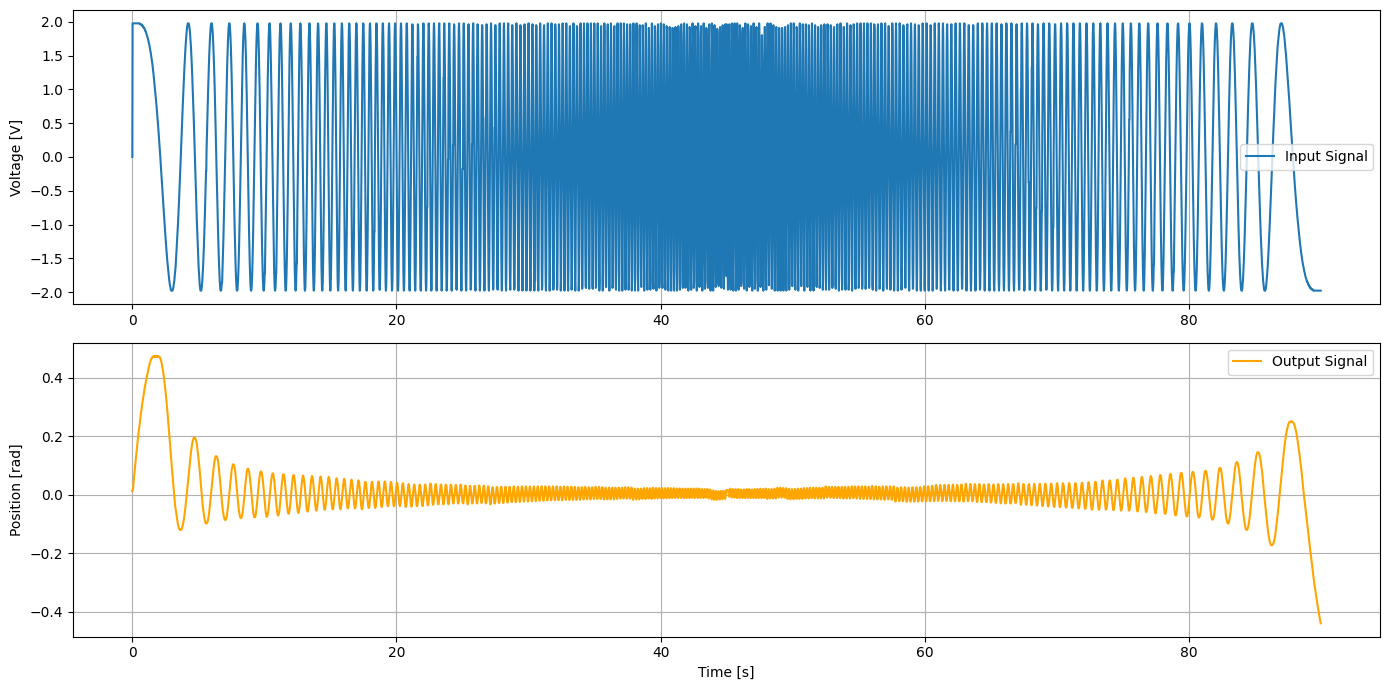

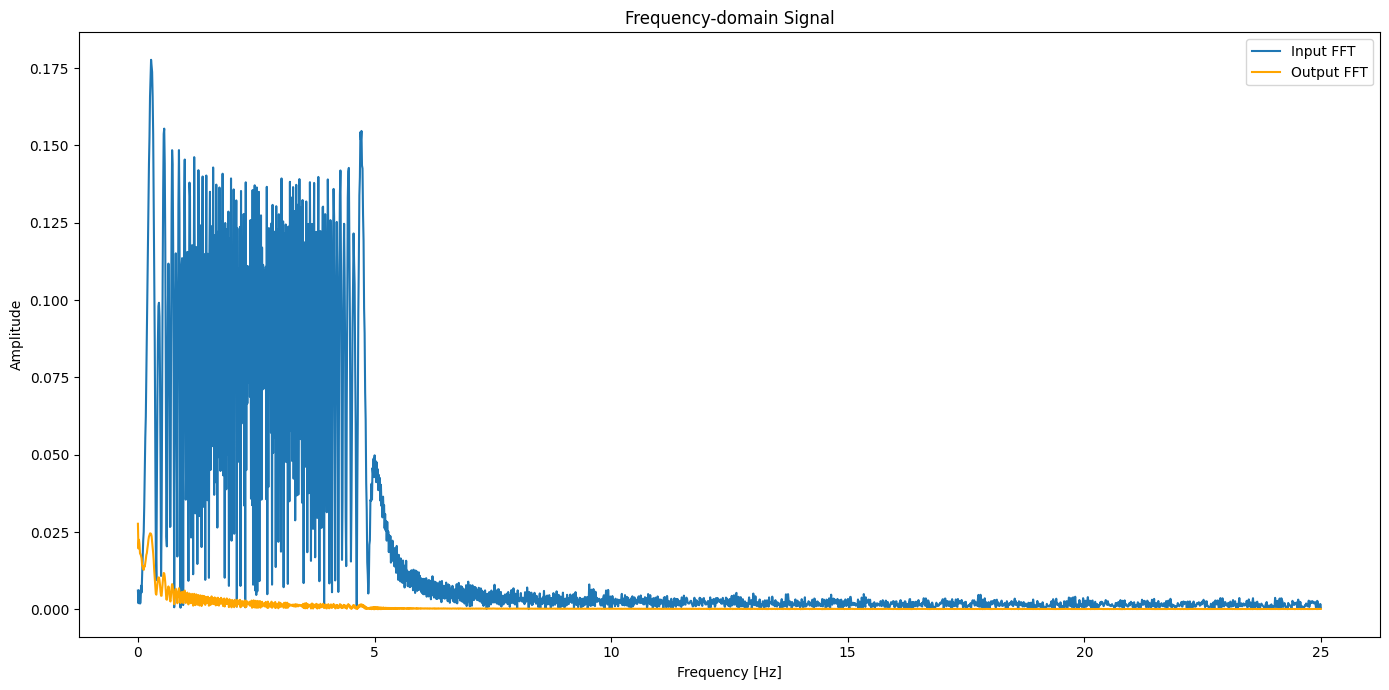

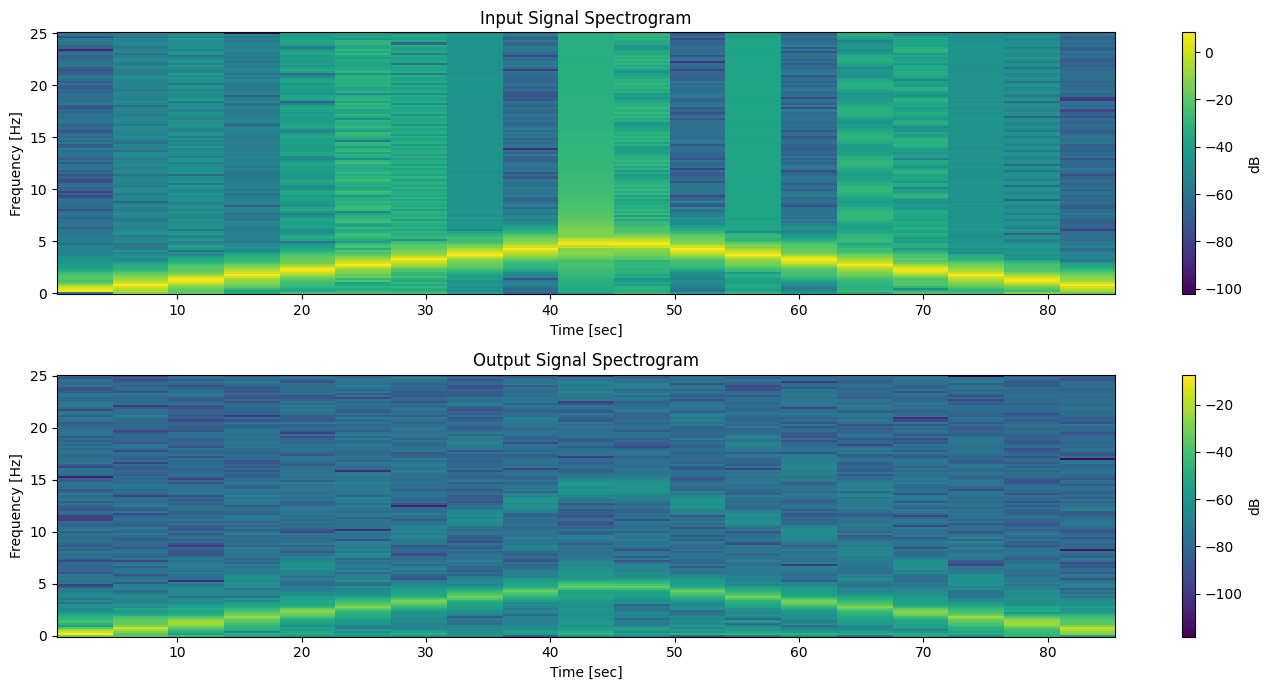

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import spectrogram, bode
from scipy.signal import cwt, ricker

# Assume 'df' is your DataFrame
# df = pd.read_csv('your_data_file.csv')  # Load your DataFrame here

# Ensure 'U' and 'θ(t)' are numeric and sorted by 'timestamp'
df.sort_values('timestamp', inplace=True)
df['U'] = pd.to_numeric(df['U'], errors='coerce')
df['θ(t)'] = pd.to_numeric(df['θ(t)'], errors='coerce')

# Calculate sampling interval and frequency
T = np.mean(np.diff(df['timestamp']))
fs = 1.0 / T

# Time-domain plot
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df['timestamp'], df['U'], label='Input Signal')
# plt.title('Time-domain Signal')
plt.ylabel('Voltage [V]')
plt.legend()
plt.grid(axis="x")
plt.subplot(2, 1, 2)
plt.plot(df['timestamp'], df['θ(t)'], label='Output Signal', color='orange')
plt.xlabel('Time [s]')
plt.ylabel('Position [rad]')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

# Frequency-domain plot
N = len(df)
f = np.linspace(0.0, fs/2, N//2)
input_fft = fft(df['U'].values)
output_fft = fft(df['θ(t)'].values)
plt.figure(figsize=(14, 7))
plt.plot(f, 2.0/N * np.abs(input_fft[:N//2]), label='Input FFT')
plt.plot(f, 2.0/N * np.abs(output_fft[:N//2]), label='Output FFT', color='orange')
plt.title('Frequency-domain Signal')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.tight_layout()
plt.show()

# Spectrogram
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
f, t, Sxx = spectrogram(df['U'], fs)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Input Signal Spectrogram')
plt.colorbar(label='dB')
plt.subplot(2, 1, 2)
f, t, Sxx = spectrogram(df['θ(t)'], fs)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Output Signal Spectrogram')
plt.colorbar(label='dB')
plt.tight_layout()
plt.show()

# Additional plots such as Bode, Nyquist, Phase Space, and Wavelet Transform 
# require specific processing depending on the system's characteristics and the data.
# The provided examples are starters, and you may need to adjust or preprocess your data further.


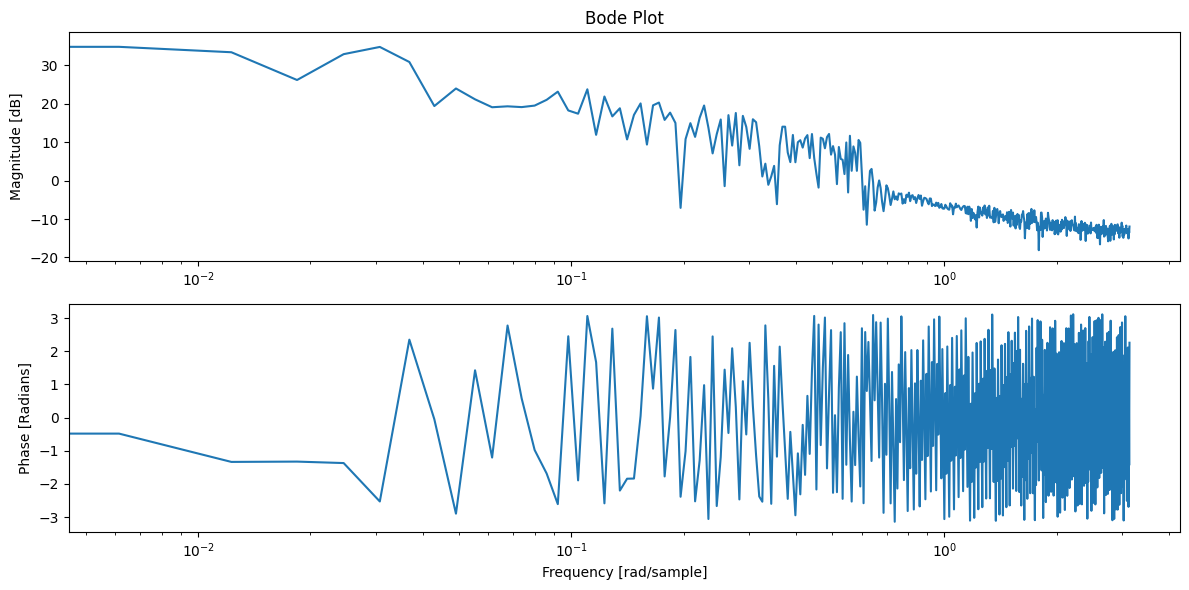

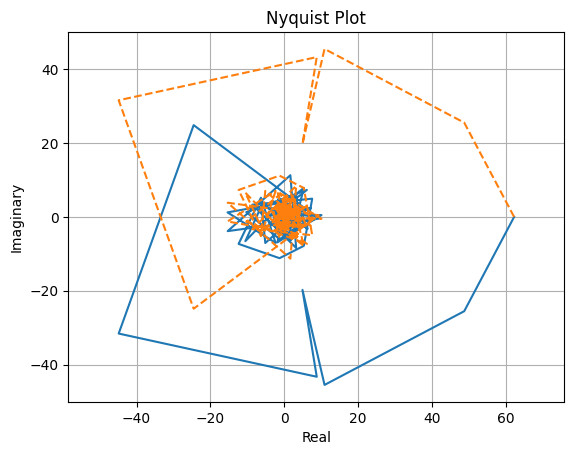

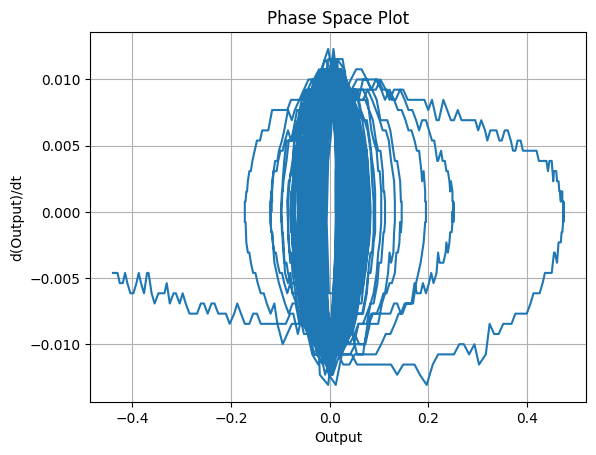

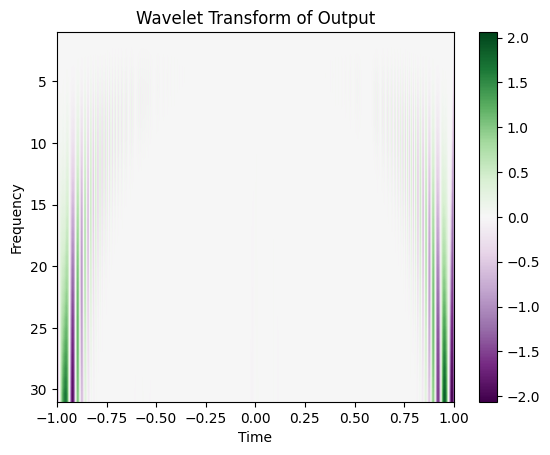

In [66]:
# Bode plot
w, h = freqz(df['θ(t)'])
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Bode Plot')
plt.ylabel('Magnitude [dB]')
plt.subplot(2, 1, 2)
plt.semilogx(w, np.angle(h))
plt.xlabel('Frequency [rad/sample]')
plt.ylabel('Phase [Radians]')
plt.tight_layout()
plt.show()

# Nyquist plot
plt.figure()
plt.plot(np.real(h), np.imag(h))
plt.plot(np.real(h), -np.imag(h), '--')
plt.title('Nyquist Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid(True)
plt.axis('equal')
plt.show()

# Phase space plot
plt.figure()
plt.plot(df['θ(t)'], np.gradient(df['θ(t)']))
plt.title('Phase Space Plot')
plt.xlabel('Output')
plt.ylabel('d(Output)/dt')
plt.grid(True)
plt.show()

# Wavelet Transform - We'll use a simple example with a continuous wavelet transform (CWT)
from scipy.signal import cwt, ricker
widths = np.arange(1, 31)
cwtmatr = cwt(df['θ(t)'], ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 31, 1], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.title('Wavelet Transform of Output')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

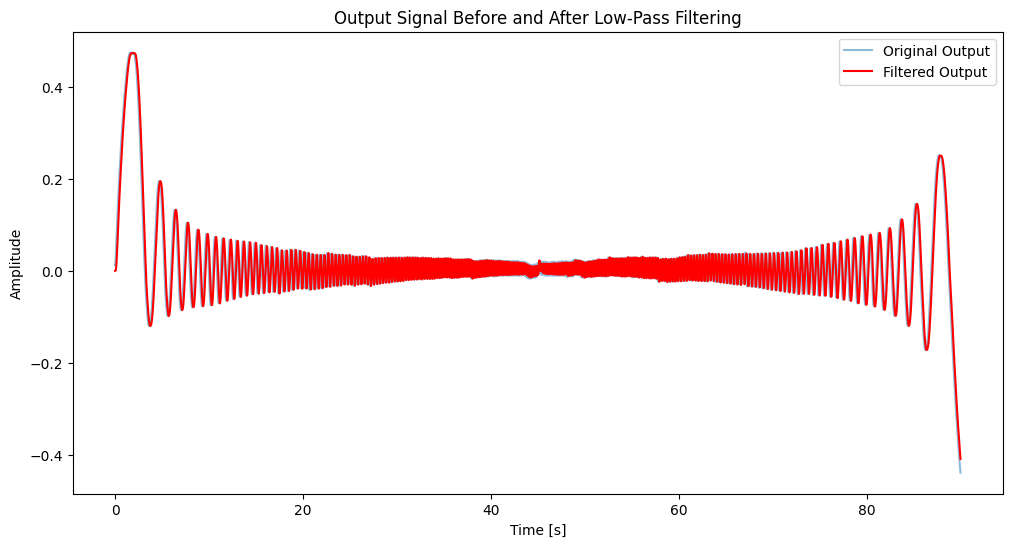

In [78]:
import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

# Function to design a Butterworth low-pass filter and apply it
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = lfilter(b, a, data)
    return filtered_data

# Your data
# Assuming 'df' is your DataFrame and 'θ(t)' is your output column
output_data = df['θ(t)'].values

# Filter specifications
cutoff_frequency = 5  # Cutoff frequency in Hz, adjust based on your needs
sampling_frequency = 50  # Sampling frequency in Hz (1 / timestep)
order = 6  # Filter order, adjust based on your needs

# Apply the filter
filtered_output = butter_lowpass_filter(output_data, cutoff_frequency, sampling_frequency, order)

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], output_data, label='Original Output', alpha=0.5)
plt.plot(df['timestamp'], filtered_output, label='Filtered Output', color='red')
plt.title('Output Signal Before and After Low-Pass Filtering')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

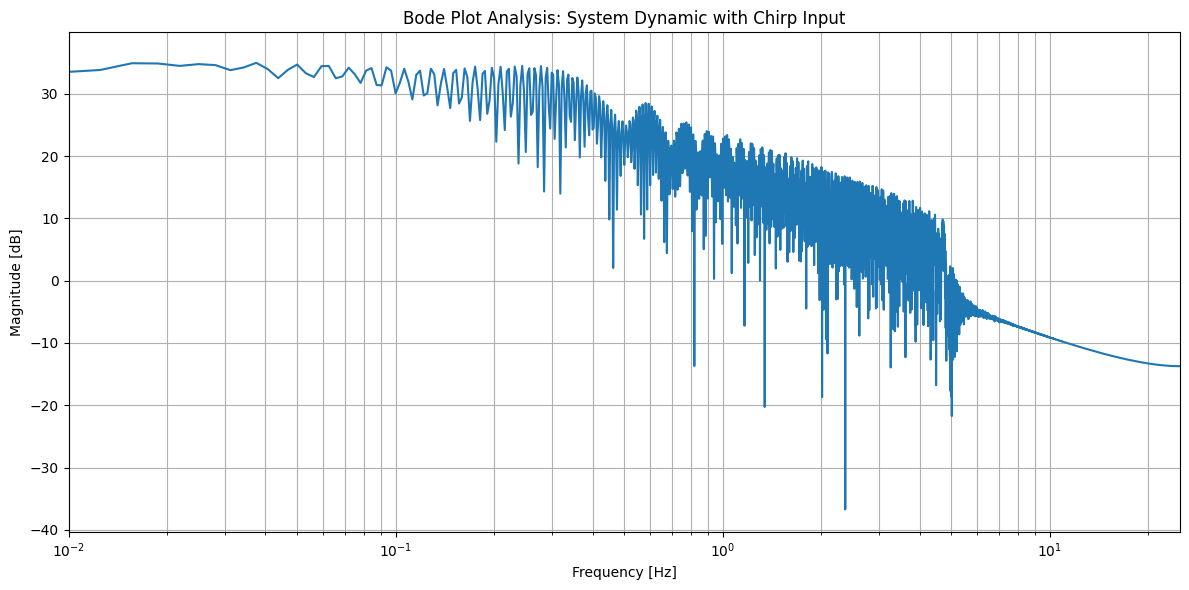

In [87]:
from scipy.signal import freqz
import matplotlib.pyplot as plt
import numpy as np

# Sampling period and frequency
Ts = 0.02  # Sampling period in seconds
fs = 1 / Ts  # Sampling frequency in Hz

# Generate frequency response
w, h = freqz(filtered_output, worN=8000)  # Increase worN for finer resolution if needed
f = w * (fs / (2 * np.pi))  # Convert from rad/sample to Hz

# Plot Bode magnitude plot
plt.figure(figsize=(12, 6))
# plt.subplot(2, 1, 1)
plt.semilogx(f, 20 * np.log10(abs(h)))  # Magnitude in dB
plt.title('Bode Plot Analysis: System Dynamic with Chirp Input')
plt.ylabel('Magnitude [dB]')
plt.xlabel('Frequency [Hz]')
plt.xlim([10e-3, fs/2])  # Limit x-axis to Nyquist frequency
plt.grid(which='both', axis='both')

# # Plot Bode phase plot
# plt.subplot(2, 1, 2)
# angles = np.unwrap(np.angle(h))  # Unwrap phase
# plt.semilogx(f, np.degrees(angles))  # Phase in degrees
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Phase [degrees]')
# plt.xlim([1, fs/2])  # Limit x-axis to Nyquist frequency
# plt.grid(which='both', axis='both')

# It is clearly a low-pass filter, with 30dB par decade. 
plt.tight_layout()
plt.show()

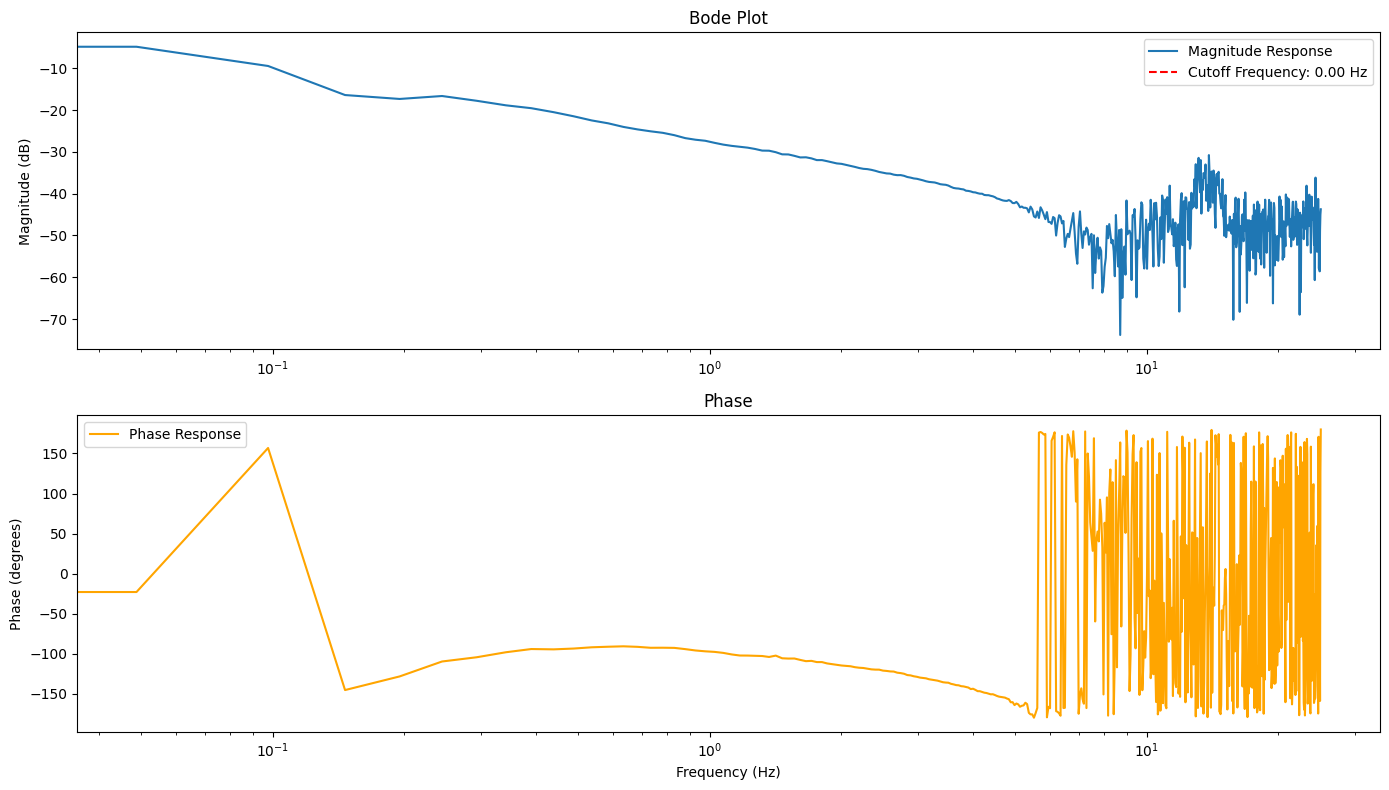

Cutoff Frequency: 0.00 Hz


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, csd, bode
from scipy.interpolate import interp1d

# Assuming df is your DataFrame with 'timestamp', 'U', and 'θ(t)' as before
# And assuming fs is the sampling frequency calculated from your 'timestamp'

# Compute the Power Spectral Densities (PSDs) and Cross Spectral Density (CSD)
f, Pxx = welch(df['U'], fs=fs, nperseg=1024)
_, Pyy = welch(df['θ(t)'], fs=fs, nperseg=1024)
_, Pxy = csd(df['U'], df['θ(t)'], fs=fs, nperseg=1024)

# Estimate the transfer function H(f) = Pxy / Pxx
H = Pxy / Pxx

# Magnitude and phase
magnitude = 20 * np.log10(np.abs(H))
phase = np.angle(H, deg=True)

# Interpolate magnitude response to find the cutoff frequency (-3 dB point)
magnitude_interp = interp1d(f, magnitude, kind='cubic')
f_dense = np.linspace(f[0], f[-1], 10000)
magnitude_dense = magnitude_interp(f_dense)
cutoff_idx = np.where(magnitude_dense <= -3)[0][0]
cutoff_frequency = f_dense[cutoff_idx]

# Bode plot
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.semilogx(f, magnitude, label='Magnitude Response')
plt.axvline(cutoff_frequency, color='r', linestyle='--', label=f'Cutoff Frequency: {cutoff_frequency:.2f} Hz')
plt.title('Bode Plot')
plt.ylabel('Magnitude (dB)')
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(f, phase, label='Phase Response', color='orange')
plt.title('Phase')
plt.ylabel('Phase (degrees)')
plt.xlabel('Frequency (Hz)')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Cutoff Frequency: {cutoff_frequency:.2f} Hz")


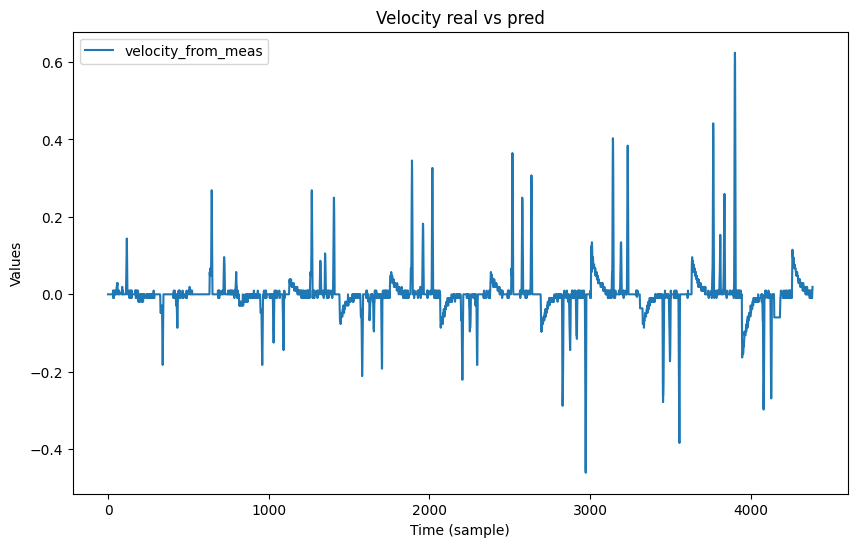

In [37]:
import numpy as np

# Compute the velocity and acceleration

# Calculate velocity (first derivative of position)
df['velocity_from_meas'] = np.gradient(df['DXL_Position'], df['t'])
df['velocity_from_ref'] = np.gradient(df['position_reference'], df['t'])

# Calculate acceleration (second derivative of position)
df['acc_from_velocity_from_meas'] = np.gradient(df['velocity_from_meas'], df['t'])
df['acc_from_meas'] = np.gradient(df['DXL_Velocity'], df['t'])
df['acc_from_ref'] = np.gradient(df['velocity_from_ref'], df['t'])

plt.figure(figsize=(10, 6))
plt.plot(df['velocity_from_meas'], label='velocity_from_meas')
# plt.plot(df['velocity_from_ref'], label='velocity_from_ref')
# plt.plot(df['DXL_Velocity'], label='DXL_Velocity')

# plt.plot(df['acc_from_velocity_from_meas'], label='acc_from_velocity_from_meas')
# plt.plot(df['acc_from_meas'], label='acc_from_meas')
# plt.plot(df['acc_from_ref'], label='acc_from_ref')
plt.xlabel('Time (sample)')
plt.ylabel('Values')
plt.title(f'Velocity real vs pred')
plt.legend()
plt.show()

In [38]:
# Export the data for further analysis in Julia
df['current_reference'] = df22['q1_l']
df.to_csv('data/Julia_analysis/chute_libre.csv', index=False)

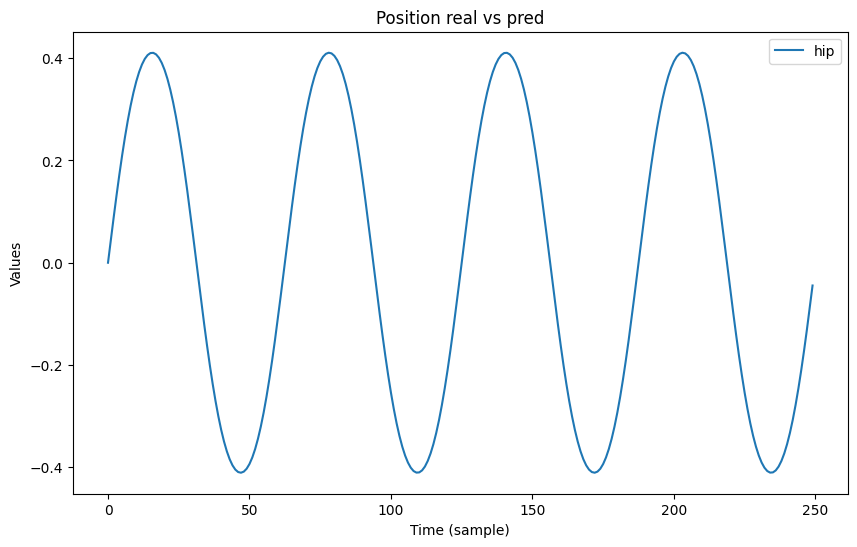

In [5]:
# Plot torque from Julia
import pandas as pd
df = pd.read_csv("data/Julia_analysis/updated_file.csv")
kt = 2.6657
ke = 3.8197

plt.figure(figsize=(10, 6))
plt.plot(df['torque_hip_from_ref'], label='hip')
# plt.plot(df['torque_knee_from_ref'], label='knee')

# plt.plot(df['torque_hip_from_meas'], label='hip1')
# plt.plot(df['torque_knee_from_meas'], label='knee1')

# plt.plot(df['torque_hip_meas'], label='hip2')
# plt.plot(df['torque_knee_meas'], label='knee2')

# plt.plot(df['t']*80e-3, df['DXL_Current'].shift(-1) * kt, label='real')
# plt.plot((df['U'] - ke * df['DXL_Velocity'])/5, label='comp')
# plt.plot((df['DXL_Velocity']), label='comp')
plt.xlabel('Time (sample)')
plt.ylabel('Values')
plt.title(f'Position real vs pred')
plt.legend()
plt.show()

# Continuer, et sûrement devoir calculer le couple à partir d'une autre mesure, comme la tension par ex...

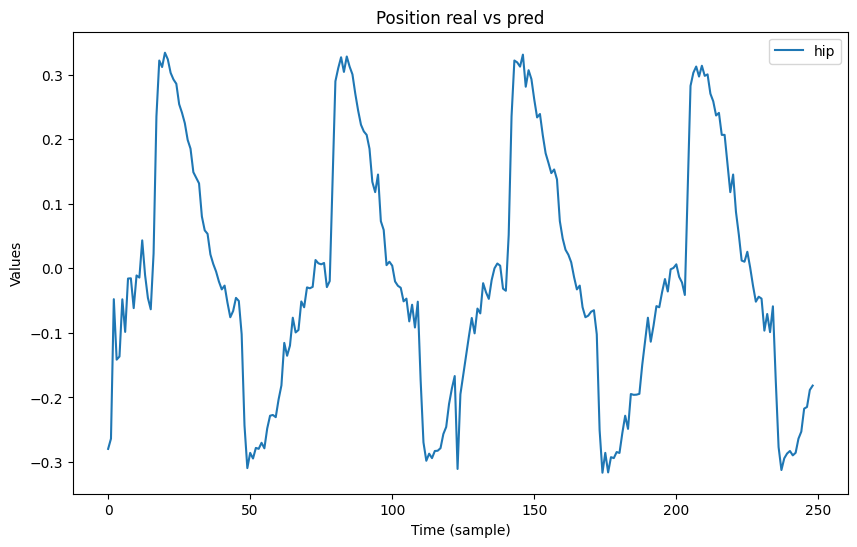

In [ ]:
kt = 2.6657
friction_torque = df['torque_hip_from_ref'] - df['DXL_Current'].shift(-1) * kt

plt.figure(figsize=(10, 6))
plt.plot(friction_torque, label='hip')

plt.xlabel('Time (sample)')
plt.ylabel('Values')
plt.title(f'Position real vs pred')
plt.legend()
plt.show()

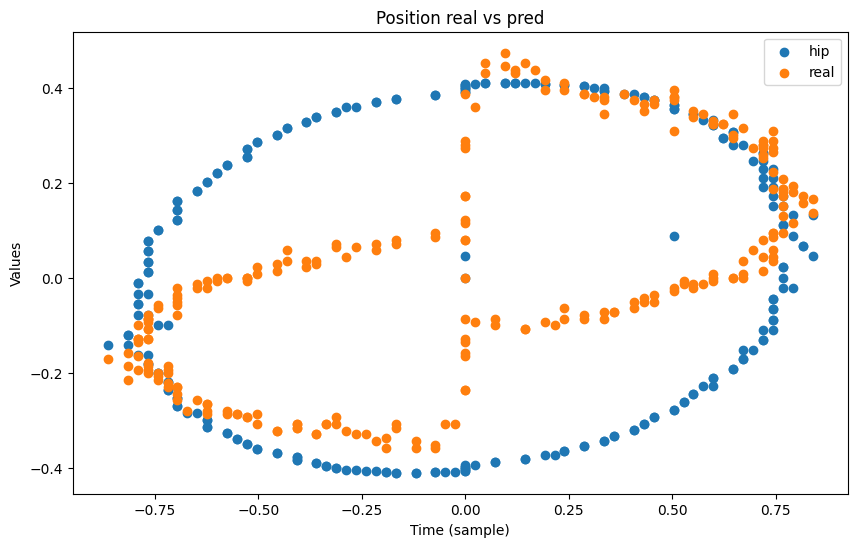

In [6]:
# Plot in function of the velocity

plt.figure(figsize=(10, 6))
# plt.scatter(df['DXL_Velocity'], df['torque_hip_from_ref'], label='hip')
plt.scatter(df['DXL_Velocity'], df['torque_hip_from_ref'], label='hip')
plt.scatter(df['DXL_Velocity'], df['DXL_Current'] * kt, label='real')

plt.xlabel('Time (sample)')
plt.ylabel('Values')
plt.title(f'Position real vs pred')
plt.legend()
plt.show()

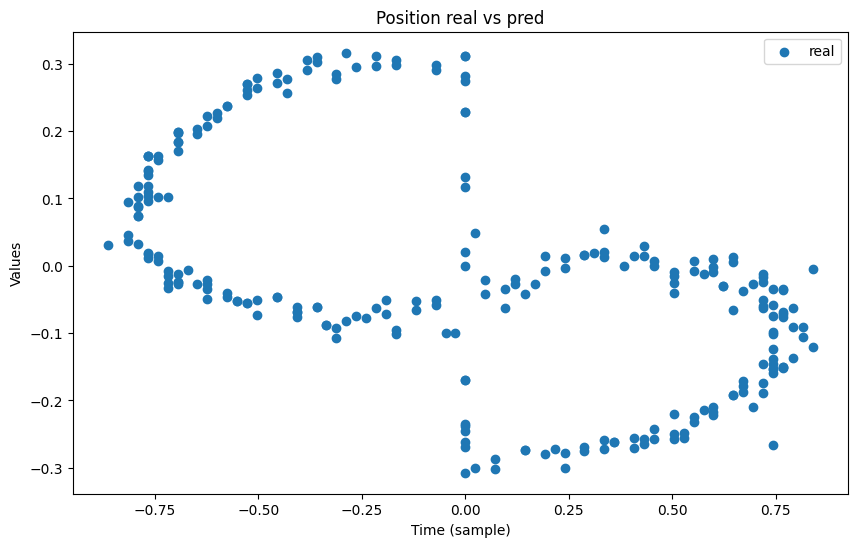

In [8]:
# Plot in function of the velocity

plt.figure(figsize=(10, 6))
# plt.scatter(df['DXL_Velocity'], df['torque_hip_from_ref'], label='hip')
# plt.scatter(df['DXL_Velocity'], df['torque_hip_from_ref'], label='hip')
plt.scatter(df['DXL_Velocity'], df['DXL_Current'] * kt - df['torque_hip_from_ref'], label='real')

plt.xlabel('Time (sample)')
plt.ylabel('Values')
plt.title(f'Position real vs pred')
plt.legend()
plt.show()

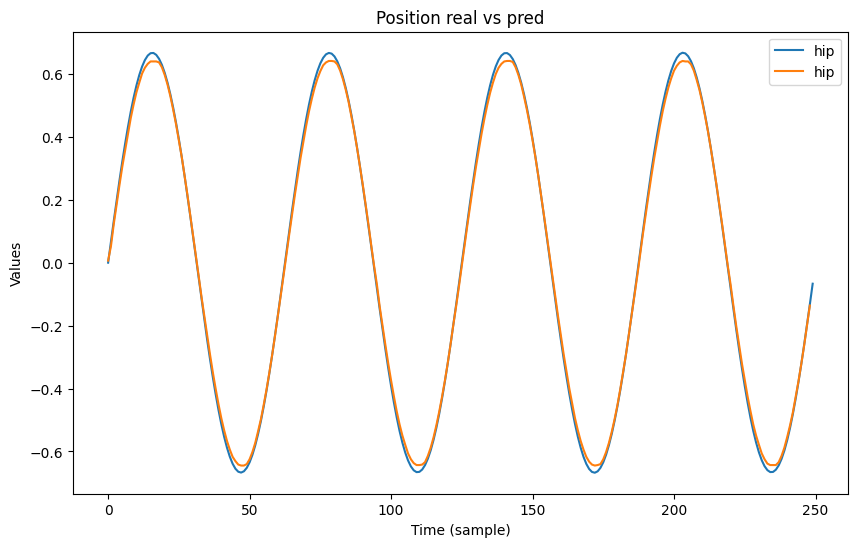

In [ ]:
# Plot position evolution

plt.figure(figsize=(10, 6))
plt.plot(df['position_from_julia_hip'], label='hip')
plt.plot(df['DXL_Position'].shift(-1), label='hip')
# plt.plot(df['position_from_julia_knee'], label='knee')
plt.xlabel('Time (sample)')
plt.ylabel('Values')
plt.title(f'Position real vs pred')
plt.legend()
plt.show()